This is the final small assignment version <br>
Student: Eric Ferreira dos Santos <br>
PAC Number: 20215568

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm

In [2]:
df = pd.read_csv('iris_data.csv')

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


This table summarizes the information from the dataset. It is presented the mean, the standard deviation, minimum value and maximum value and the quartiles. <br> There are missing values in the sepal width and sepal length, but we do not know how these values were collected. In this case, I believe that these values are Missing completely at random (MCR). 

In [4]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,149.000000,149.000000,150.000000
mean,9.407333,3.057718,3.773826,1.199333
std,43.621311,0.437311,1.760543,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,540.000000,4.400000,6.900000,2.500000


In [5]:
print('Number of setosa samples:', len(df[df['Species']=='setosa']))
print('Number of versicolor samples:', len(df[df['Species']=='versicolor']))
print('Number of virginica samples:', len(df[df['Species']=='virginica']))

Number of setosa samples: 50
Number of versicolor samples: 50
Number of virginica samples: 50


In [6]:
#unique species
df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
#missing data
df[df['Sepal.Width'].isnull()]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
12,4.8,NaN,NaN,0.1,setosa


In [8]:
#outlier data
df[df['Sepal.Length']==540]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5,540.0,3.9,1.7,0.4,setosa


We can see that the sepal length has an outlier value in the setosa species, which can spoil the analysis. At the same time, is in the setosa species that exists missing values for the width and length.<br>
We would like to predict the missing values (Sepal.Width and Petal.Length in setosa species) using Linear Regression

In [9]:
df_setosa = df[df['Species']=='setosa']

Verifying the linearity between the variables

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Sepal.Length', ylabel='Sepal.Width'>

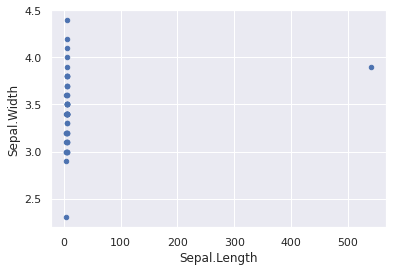

In [10]:
sns.set()
%matplotlib inline

df_setosa.plot.scatter(x='Sepal.Length', y='Sepal.Width')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Petal.Length', ylabel='Sepal.Width'>

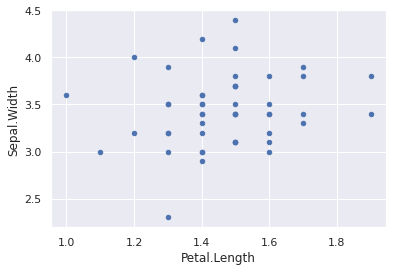

In [11]:
df_setosa.plot.scatter(x='Petal.Length', y='Sepal.Width')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Petal.Width', ylabel='Sepal.Width'>

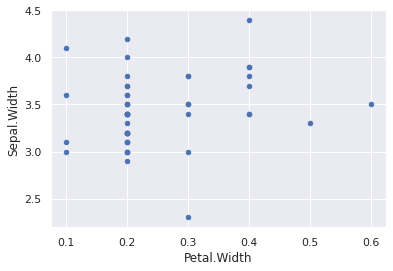

In [12]:
df_setosa.plot.scatter(x='Petal.Width', y='Sepal.Width')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Sepal.Length', ylabel='Petal.Length'>

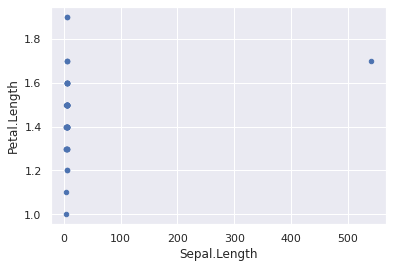

In [13]:
df_setosa.plot.scatter(x='Sepal.Length', y='Petal.Length')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Sepal.Width', ylabel='Petal.Length'>

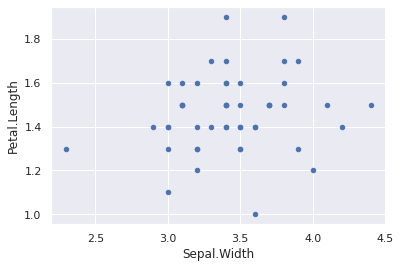

In [14]:
df_setosa.plot.scatter(x='Sepal.Width', y='Petal.Length')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Petal.Width', ylabel='Petal.Length'>

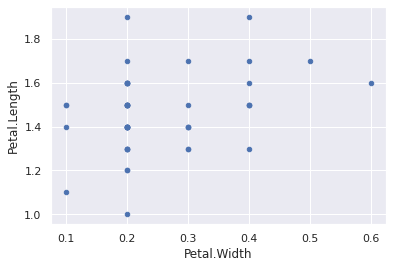

In [15]:
df_setosa.plot.scatter(x='Petal.Width', y='Petal.Length')

With the charts above, we can say that the variables are not linearly separable in the setosa species, so we cannot infer a value using Linear regression.<br>
In the work 'The prevention and handling of the missing data' (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/#B10), Hyun Kang brings some techniques to deal with missing data. A citation from the work is "Multiple imputation is another useful strategy for handling the missing data. In a multiple imputation, instead of substituting a single value for each missing data, the missing values are replaced with a set of plausible values which contain the natural variability and uncertainty of the right values."<br>
I used this idea to attack both problems: the outlier and the missing data. I changed the value of the sepal length from the outlier (540) to a plausible value (4.8 from the record with missing value). The record that has missing value is removed from the dataset, then we have a treated dataset.

In [16]:
df.loc[df['Sepal.Length']==540,'Sepal.Length'] = 4.8

In [36]:
df = df.drop([12])

Next, the boxplot shows how the botanists can see the univariate statistics for each class, but we can improve this analysis when looking to each class separately.

array([[<AxesSubplot:title={'center':'Petal.Length'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'Petal.Width'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'Sepal.Length'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'Sepal.Width'}, xlabel='[Species]'>]],
      dtype=object)

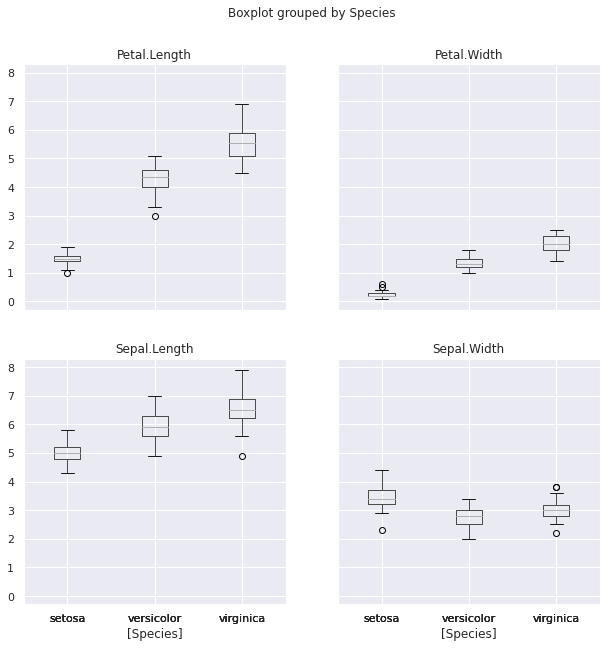

In [37]:
df.boxplot(by='Species',figsize=(10,10))

In [19]:
df_setosa = df[df['Species']=='setosa']
df_versicolor = df[df['Species']=='versicolor']
df_virginica = df[df['Species']=='virginica']

Using the Spearman correlation for each class to get the most correlated variables and using the univariate statistic, we can create a simple algorithm to classify the species.<br>
For example, to classify a flower as a setosa, we can look to the sepal length and sepal width. If the values are close to 4.99 and 3.43, respectively, the flower can be classified as setosa.

In [38]:
df_setosa.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,0.704877,0.218626,0.229609
Sepal.Width,0.704877,1.000000,0.171827,0.207069
Petal.Length,0.218626,0.171827,1.000000,0.328387
Petal.Width,0.229609,0.207069,0.328387,1.000000


In [21]:
df_setosa.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,50.000000,49.000000,49.000000,50.000000
mean,4.994000,3.436735,1.463265,0.246000
std,0.348999,0.377874,0.175231,0.105386
min,4.300000,2.300000,1.000000,0.100000
25%,4.800000,3.200000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.175000,3.700000,1.600000,0.300000
max,5.800000,4.400000,1.900000,0.600000


For versicolor, we can look to the sepal length, petal width and petal length. If the values are close to 5.93, 1.32 and 4.26, respectively, the flower can be classified as versicolor.

In [22]:
df_versicolor.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,0.525911,0.754049,0.546461
Sepal.Width,0.525911,1.000000,0.560522,0.663999
Petal.Length,0.754049,0.560522,1.000000,0.786668
Petal.Width,0.546461,0.663999,0.786668,1.000000


In [23]:
df_versicolor.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


For virginica, we can look to the sepal length and petal length. If the values are close to 6.58 and 5.52, respectively, the flower can be classified as virginica.

In [24]:
df_virginica.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,0.457228,0.864225,0.281108
Sepal.Width,0.457228,1.000000,0.401045,0.537728
Petal.Length,0.864225,0.401045,1.000000,0.322108
Petal.Width,0.281108,0.537728,0.322108,1.000000


In [25]:
df_virginica.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


To improve the classification, we can create a model that split the classes. We will use the Logistic Regression to create a model to classification the species.<br>
I will split the data between train and test by 70% and 30% respectively, shuffling the data.

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [39]:
#split the dataset in 70% for training and 30% for test
X_train, X_test, y_train, y_test = train_test_split(df[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']], 
                                                    df['Species'], test_size=0.3, 
                                                    random_state=42, shuffle=True)

In [40]:
y_train.value_counts()

virginica     37
versicolor    37
setosa        30
Name: Species, dtype: int64

In [55]:
#getting best hyperparameters for logistic regression
param_grid = {
    'penalty': ['l2', 'none', ],  
    'multi_class': ['multinomial','ovr'],
    'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
    'n_jobs': [-1]
    }

logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,param_grid,cv=5)
logreg_cv.fit(X_train, y_train)

print("best parameters",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

best parameters {'multi_class': 'multinomial', 'n_jobs': -1, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.9904761904761905


In [42]:
#training the classifier
clf=LogisticRegression(multi_class= 'multinomial', n_jobs= -1, penalty= 'l2', solver= 'sag', random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

/home/ericferreira/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9555555555555556

In [45]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['setosa','versicolor','virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



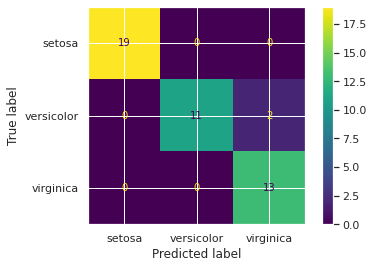

In [47]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

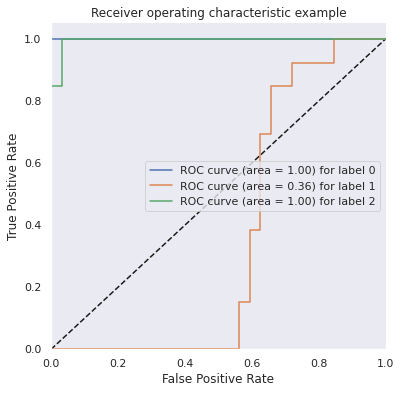

In [68]:
#https://stackoverflow.com/a/59326862/10697134
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(clf, X_test, y_test, n_classes=3, figsize=(6, 6))

I searched for the best hyperparameters for the model and then trained it. After this, I check the test data's accuracy and see that the model achieved almost 96% on accuracy. The confusion matrix and the ROC curve shows the model effectiveness. With this model, the user only needs to input the features' values and get the flower classification.